# Regularized Regression

To better understand the relationship between linear regression, ridge regression,and lasso, we will be working with synthetic data in this lab. Let's start by learning a bit more about our fake dataset and preparing our data for regression.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Seed for reproducibility
np.random.seed(0)

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples)


In [2]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Create and fit Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calculate MSE and R^2 for Ridge regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R²:", ridge_r2)




Ridge Regression RMSE: 0.14410020171824975
Ridge Regression R²: 0.9984722762470865


In [4]:
# Create and fit Lasso regression model
lasso_model = Lasso() 
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSE and R^2 for Lasso regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R²:", lasso_r2)

Lasso Regression RMSE: 1.2984978990079017
Lasso Regression R²: 0.8759496036905758


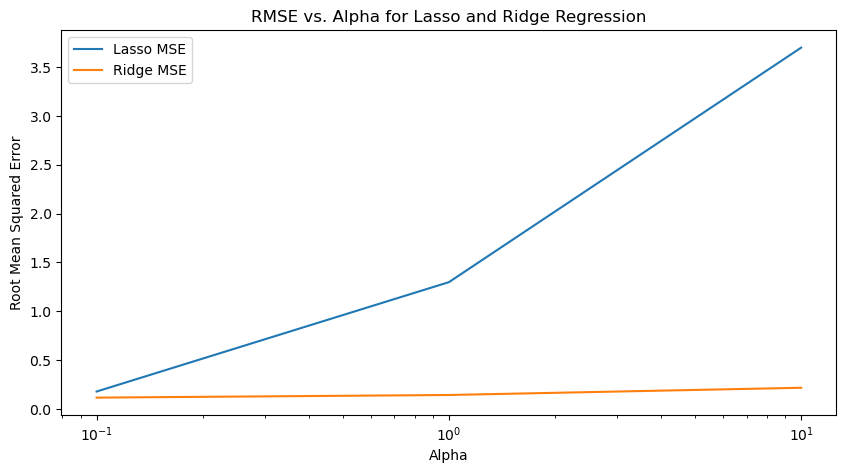

In [5]:
# Visualize alphas against RMSE for lasso and ridge
rmse_lasso = []
rmse_ridge = []
alphas = [0.1,1,10]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    rmse_lasso.append(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
    rmse_ridge.append(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

plt.figure(figsize=(10, 5))
plt.plot(alphas, rmse_lasso, label='Lasso MSE')
plt.plot(alphas, rmse_ridge, label='Ridge MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Alpha for Lasso and Ridge Regression')
plt.legend()
plt.show()



In [9]:
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha=alpha)
    else:
        model = Ridge(alpha=alpha)
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label=f'Predictions (alpha={alpha})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{model_type} Regression: Predictions vs Actual (alpha={alpha})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    # Adjust the position of the text box
    #plt.figtext(0.5, -0.05, f'MSE: {mse:.2f}, R²: {r2:.2f}', ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.show()

# Create interactive widgets

#value = 1: starting value, base = 10: logarithmic base, min: min exponent with a base of 10, max: max exponent with base of 10
alpha_slider = FloatLogSlider(value=1.0, base=10, min=-3, max=3, step=0.1, description='Alpha')
model_selector = {'Lasso': 'Lasso', 'Ridge': 'Ridge'}

interact(update_alphas, alpha=alpha_slider, model_type=model_selector)


interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>

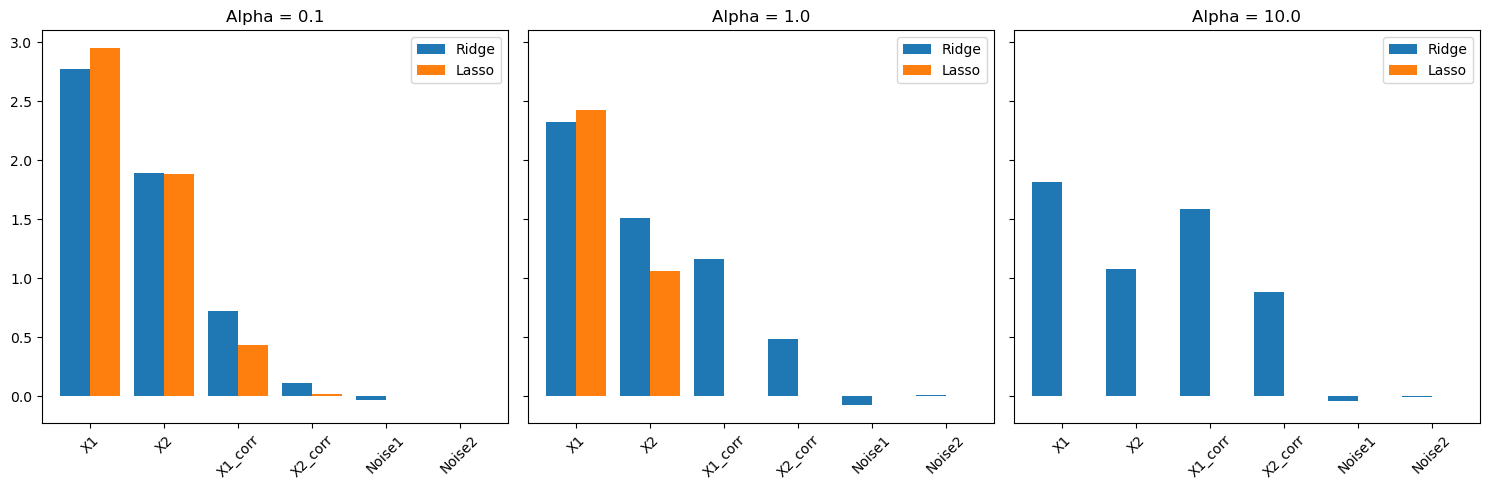

In [11]:
alphas = [0.1, 1.0, 10.0]
data = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha=alpha).fit(X, y)
    data.append(pd.DataFrame({
        'Ridge': ridge.coef_, # coef has as many indexes as there are variables
        'Lasso': lasso.coef_
    }, index=['X1', 'X2', 'X1_corr', 'X2_corr', 'Noise1', 'Noise2'])) # create feature names in new dataframe

    
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) # sharey ensures they have same y axis
for i, df in enumerate(data): # i tracks current plot, df is each of the 3 dataframes in data
    df.plot.bar(ax=axes[i], width=0.8)
    axes[i].set_title(f'Alpha = {alphas[i]}')
    axes[i].set_xticklabels(df.index, rotation=45)

plt.tight_layout()
plt.show()